In [2]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [3]:
data = pd.read_csv('..\..\..\listings.csv') #Importing Dataset
        
data_Numeric = pd.DataFrame(data[["id","host_total_listings_count","zipcode","latitude","longitude","accommodates","bathrooms","bedrooms","beds","price","weekly_price","monthly_price","security_deposit","cleaning_fee","guests_included","extra_people","minimum_nights","maximum_nights","availability_30","availability_90","availability_365","number_of_reviews","review_scores_rating","review_scores_accuracy","review_scores_cleanliness","review_scores_checkin","review_scores_communication","review_scores_location","review_scores_value","reviews_per_month"]])

for var in data_Numeric:
    if(data_Numeric[var].dtypes == "object"):
        data_Numeric[var] = data_Numeric[var].str.replace(',', '').str.replace('$', '')
        data_Numeric[var] = data_Numeric[var].apply(pd.to_numeric,errors='coerce')


data_Numeric = data_Numeric.dropna()
useless = ["zipcode","latitude","longitude","monthly_price","weekly_price"]
data_Numeric_changed=data_Numeric.drop(axis=1,columns=useless)

price_changed = pd.DataFrame(data_Numeric_changed["price"])
reviewscore_changed = pd.DataFrame(data_Numeric_changed["review_scores_rating"])



data_Numeric_changed.head()

,id,host_total_listings_count,accommodates,bathrooms,bedrooms,beds,price,security_deposit,cleaning_fee,guests_included,...,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
1,953595,6.0,4,1.0,1.0,1.0,150.0,100.0,40.0,1,...,291,43,96.0,10.0,10.0,10.0,10.0,10.0,10.0,1.48
9,2493658,6.0,4,1.0,1.0,1.0,150.0,100.0,40.0,1,...,324,32,97.0,10.0,10.0,10.0,10.0,10.0,9.0,1.55
11,4454295,1.0,2,1.0,1.0,1.0,99.0,500.0,150.0,1,...,229,8,97.0,10.0,10.0,9.0,10.0,10.0,9.0,0.98
12,3883392,1.0,4,1.0,2.0,3.0,245.0,300.0,95.0,1,...,362,13,98.0,10.0,10.0,10.0,10.0,10.0,10.0,0.92
32,5978498,1.0,4,3.0,3.0,2.0,175.0,200.0,80.0,1,...,213,8,88.0,9.0,9.0,9.0,9.0,10.0,9.0,1.31


In [9]:
from sklearn.model_selection import train_test_split

data_Numeric_Train, data_Numeric_test,price_Train, price_test,reviewscore_Train, reviewscore_test = train_test_split(data_Numeric_changed,price_changed,reviewscore_changed,test_size = 0.15)

print("Train Set :", data_Numeric_Train.shape, price_Train.shape, reviewscore_Train.shape)
print("Test Set  :", data_Numeric_test.shape, price_test.shape, reviewscore_test.shape)

Train Set : (603, 25) (603, 1) (603, 1)
Test Set  : (107, 25) (107, 1) (107, 1)


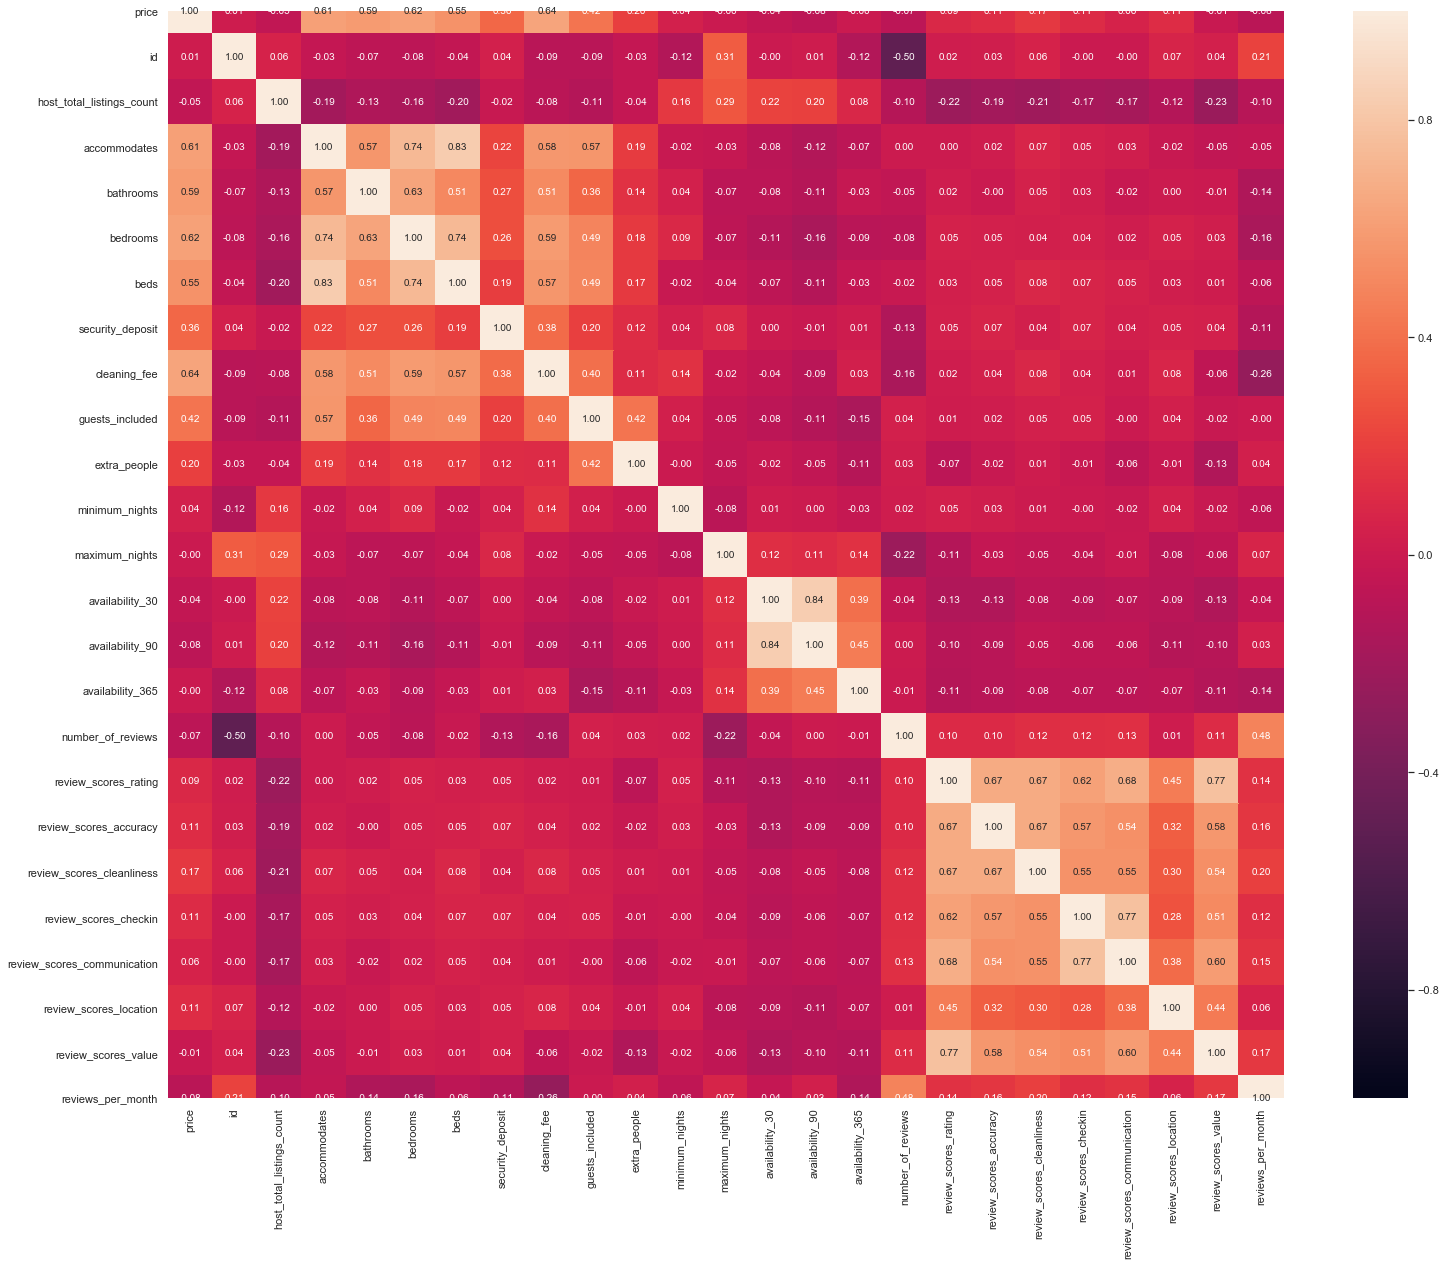

In [10]:
# Correlation between Response and the Predictors
trainDF = pd.concat([price_Train, data_Numeric_Train.reindex(index=data_Numeric_Train.index)], sort = False)

f, axes = plt.subplots(1, 1, figsize=(25, 20))
sb.heatmap(trainDF.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")

In [11]:
count = 0
highrelation = []
for var in trainDF.corr():
    if(trainDF.corr()['price'][count] > 0.3):
        print("Variables that are Highly Related:",var)
        if(var != "price"):
            highrelation.append(var) 
    count+=1
    
index = 0
index2 = 0
Multi_High_Related_Train = {} 
Multi_High_Related_Test = {}

for var in highrelation:
    if(index < len(highrelation)):
        Multi_High_Related_Train[index]={} 
        Multi_High_Related_Test[index]={} 
        index+=1
        
index = 0
for var in highrelation:
    for var2 in highrelation:        
        if(var2 != var and index<len(highrelation)):
            Multi_High_Related_Train[index][index2] = pd.DataFrame(data_Numeric_Train[[var,var2]])
            Multi_High_Related_Test[index][index2] = pd.DataFrame(data_Numeric_test[[var,var2]])
            index2+=1
    index2=0
    index+=1



Variables that are Highly Related: price
Variables that are Highly Related: accommodates
Variables that are Highly Related: bathrooms
Variables that are Highly Related: bedrooms
Variables that are Highly Related: beds
Variables that are Highly Related: security_deposit
Variables that are Highly Related: cleaning_fee
Variables that are Highly Related: guests_included


In [12]:
# Import LinearRegression model from Scikit-Learn
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso


index = 0
linreg = {}

for var in Multi_High_Related_Train:
    if(index < len(Multi_High_Related_Train)):
        linreg[index]={} 
        index+=1
        
index = 0
index2 = 0
for var in Multi_High_Related_Train:
    for var2 in Multi_High_Related_Train[var]:
        linreg[index][index2] = LinearRegression()
        linreg[index][index2].fit(Multi_High_Related_Train[index][index2], price_Train)
        index2+=1
    index2=0
    index+=1

In [13]:
index = 0
price_train_pred = {}
price_test_pred = {}

for var in linreg:
    if(index < len(linreg)):
        price_train_pred[index]={} 
        price_test_pred[index]={} 
        index+=1

index = 0
index2 = 0
for var in linreg:
    for var2 in linreg[var]:
        price_train_pred[index][index2] = linreg[index][index2].predict(Multi_High_Related_Train[index][index2])
        price_test_pred[index][index2] = linreg[index][index2].predict(Multi_High_Related_Test[index][index2])
        index2+=1
    index2=0
    index+=1

In [17]:
index = 0
index2 = 0

# Import mean_squared_error from sklearn
from sklearn.metrics import mean_squared_error


for var in price_train_pred:
    for var2 in price_train_pred[var]:
        if(linreg[index][index2].score(Multi_High_Related_Train[index][index2], price_Train)>0.4):
            print("For [",var,"][",var2,"]")
            print(Multi_High_Related_Train[index][index2].columns)
            print("Train Explained Variance (R^2) \t:", linreg[index][index2].score(Multi_High_Related_Train[index][index2], price_Train))
            print("Test Explained Variance (R^2) \t:", linreg[index][index2].score(Multi_High_Related_Test[index][index2], price_test))
            print()
        
        index2+=1
    index2=0
    index+=1

For [ 0 ][ 0 ]
Index(['accommodates', 'bathrooms'], dtype='object')
Train Explained Variance (R^2) 	: 0.4653303854582611
Test Explained Variance (R^2) 	: 0.45911767607564435

For [ 0 ][ 1 ]
Index(['accommodates', 'bedrooms'], dtype='object')
Train Explained Variance (R^2) 	: 0.4413173489473837
Test Explained Variance (R^2) 	: 0.46723777863561744

For [ 0 ][ 3 ]
Index(['accommodates', 'security_deposit'], dtype='object')
Train Explained Variance (R^2) 	: 0.4307001227255127
Test Explained Variance (R^2) 	: 0.4867745967486603

For [ 0 ][ 4 ]
Index(['accommodates', 'cleaning_fee'], dtype='object')
Train Explained Variance (R^2) 	: 0.4957070407487402
Test Explained Variance (R^2) 	: 0.4907583229118456

For [ 1 ][ 0 ]
Index(['bathrooms', 'accommodates'], dtype='object')
Train Explained Variance (R^2) 	: 0.4653303854582612
Test Explained Variance (R^2) 	: 0.45911767607564435

For [ 1 ][ 1 ]
Index(['bathrooms', 'bedrooms'], dtype='object')
Train Explained Variance (R^2) 	: 0.45312198850529617


In [15]:
#try predicting

try_Pred = data_Numeric_changed[data_Numeric_changed["id"].isin(["4454295"])]
data_Numeric_changed.head()

,id,host_total_listings_count,accommodates,bathrooms,bedrooms,beds,price,security_deposit,cleaning_fee,guests_included,...,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
1,953595,6.0,4,1.0,1.0,1.0,150.0,100.0,40.0,1,...,291,43,96.0,10.0,10.0,10.0,10.0,10.0,10.0,1.48
9,2493658,6.0,4,1.0,1.0,1.0,150.0,100.0,40.0,1,...,324,32,97.0,10.0,10.0,10.0,10.0,10.0,9.0,1.55
11,4454295,1.0,2,1.0,1.0,1.0,99.0,500.0,150.0,1,...,229,8,97.0,10.0,10.0,9.0,10.0,10.0,9.0,0.98
12,3883392,1.0,4,1.0,2.0,3.0,245.0,300.0,95.0,1,...,362,13,98.0,10.0,10.0,10.0,10.0,10.0,10.0,0.92
32,5978498,1.0,4,3.0,3.0,2.0,175.0,200.0,80.0,1,...,213,8,88.0,9.0,9.0,9.0,9.0,10.0,9.0,1.31


In [16]:
data_needed = pd.DataFrame(try_Pred[Multi_High_Related_Train[0][3].columns])
prediction = linreg[0][3].predict(data_needed)
print("Predicted:",prediction)
print("Actual:", try_Pred['price'])

Predicted: [[102.62476347]]
Actual: 11    99.0
Name: price, dtype: float64
